# Fase 1 -----> EXPLORACIÓN, LIMPIEZA Y UNIÓN DE CSV.

1. Exploración Inicial:

Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos:

Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos. Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

--> IMPORTAMOS LAS LIBRERÍAS QUE VAMOS A NECESITAR:

In [19]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 
#Para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
# -----------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from itertools import combinations

- Lo primero que debemos realizar es la carga de datos con el método read_csv de pandas

- Comenzaremos leyendo el primer csv ---> Customer Flight Activity

In [20]:
df_flight_activity = pd.read_csv("Customer Flight Activity.csv")

Método info de pandas para ver:
- El total de filas y columnas en el dataframe, 
- La cantidad de valores no nulos 
- El tipo de dato por columna.

In [21]:
df_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


- ¿Qué conclusión podemos sacar?

- Al ver la info() de nuestro DataFrame nos damos cuenta de que todos los datos son NUMÉRICOS.

- Continuamos con visualizaciones de:

- Las 5 primeras filas usando #head()
- Las 5 últimas filas usando #tail()

In [22]:
df_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [23]:
df_flight_activity.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [24]:
## Creamos un diccionario para renombrar las columnas en español.
# De esta forma conseguimos que sea una forma más clara y eficiente para trabajar con los datos.

columnas_traducidas = {
    'Loyalty Number': 'numero_fidelización',
    'Year': 'año',
    'Month': 'mes',
    'Flights Booked': 'vuelos_reservados',
    'Flights with Companions': 'vuelos_con_acompañantes',
    'Total Flights': 'vuelos_totales',
    'Distance': 'distancia',
    'Points Accumulated': 'puntos_acumulados',
    'Points Redeemed': 'puntos_canjeados',
    'Dollar Cost Points Redeemed': 'costo_en_dolares_de_puntos_canjeados'
}

# Con el método de pandas, renombramos las columnas usando el diccionario creado:

df_flight_activity.rename(columns = columnas_traducidas, inplace=True)
# El inplace es un parámetro que altera el DataFrame original

print(columnas_traducidas)

{'Loyalty Number': 'numero_fidelización', 'Year': 'año', 'Month': 'mes', 'Flights Booked': 'vuelos_reservados', 'Flights with Companions': 'vuelos_con_acompañantes', 'Total Flights': 'vuelos_totales', 'Distance': 'distancia', 'Points Accumulated': 'puntos_acumulados', 'Points Redeemed': 'puntos_canjeados', 'Dollar Cost Points Redeemed': 'costo_en_dolares_de_puntos_canjeados'}


In [25]:
# Localizamos cuántas filas y columnas tenemos en nuestro DF1. 
# Usamos la función de forma utilizando shape

df_flight_activity.shape

(405624, 10)

- Vemos que tenemos 405624 filas
- 10 columnas

In [26]:
# Sacamos de nuevo info() de nuestro DF1.

df_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   numero_fidelización                   405624 non-null  int64  
 1   año                                   405624 non-null  int64  
 2   mes                                   405624 non-null  int64  
 3   vuelos_reservados                     405624 non-null  int64  
 4   vuelos_con_acompañantes               405624 non-null  int64  
 5   vuelos_totales                        405624 non-null  int64  
 6   distancia                             405624 non-null  int64  
 7   puntos_acumulados                     405624 non-null  float64
 8   puntos_canjeados                      405624 non-null  int64  
 9   costo_en_dolares_de_puntos_canjeados  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


- Al sacar de nuevo la información, me aseguro de haber cambiado correctamente las columnas en español.

In [27]:
# Sumamos los nulos por columnas.

df_flight_activity.isna().sum()

numero_fidelización                     0
año                                     0
mes                                     0
vuelos_reservados                       0
vuelos_con_acompañantes                 0
vuelos_totales                          0
distancia                               0
puntos_acumulados                       0
puntos_canjeados                        0
costo_en_dolares_de_puntos_canjeados    0
dtype: int64

- No constan valores nulos en las columnas de nuestro DF.

In [28]:
# Utilizamos el método describe que nos permite ver las estadísticas descriptivas de las variables numéricas de nuestro DF.

df_flight_activity.describe().T

# La 'T' de transpose cambia las filas y columnas 

,count,mean,std,min,25%,50%,75%,max
numero_fidelización,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
año,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
mes,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
vuelos_reservados,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
vuelos_con_acompañantes,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
vuelos_totales,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
distancia,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
puntos_acumulados,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
puntos_canjeados,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
costo_en_dolares_de_puntos_canjeados,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


¿Qué podemos extraer del describe para el conjunto de datos FLIGHT ACTIVITY si queremos hablar de las cantidades más altas?


- El número_fidelización consta de un baremo entre 100018.0 (min) a 999986.0 (max) y hay un total de 405624.0 números de fidelizaciones.
- Al visualizar los meses y los años, vemos que va desde enero del 2017 a diciembre de 2018.
- La cantidad más alta de vuelos_reservados es de 21.0.
- La cantidad más alta de vuelos_con_acompañantes es de 11.0.
- La cantidad más alta de vuelos_totales es de 32.0.
- La distancia más alta es de 6293.0.
- La cantidad más alta de puntos_acumulados es de 676.5.
- La cantidad más alta de puntos_canjeados es de 876.0.
- La cantidad más alta de costo_en_dolares_de_puntos_canjeados es de 71.0.

# Conclusión:
- Los tipos de datos son coherentes. 
- El programa de fidelización es bastante popular, ya que los clientes acumulan una gran cantidad de puntos.
- Algunos clientes son más activos que otros; hay una gran variedad en el comportamiento de los clientes. Algunos viajan mucho y acumulan muchos puntos, mientras que otros son menos activos.
- Podríamos hablar de una desviación estándar alta. 

- Continuamos con nuestro primer DF (fligth_activity) 
# GRÁFICAMENTE

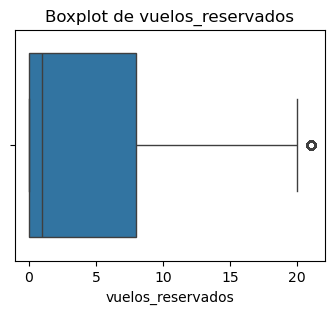

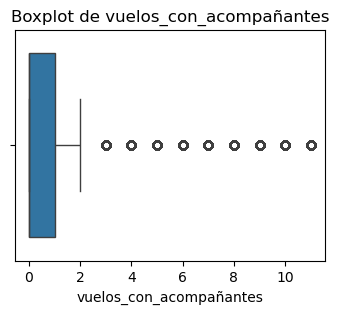

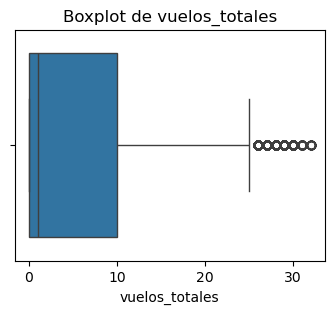

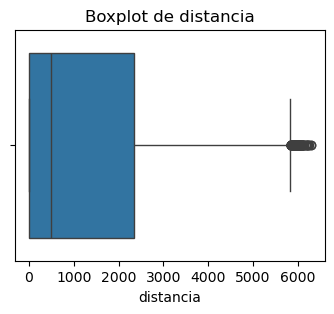

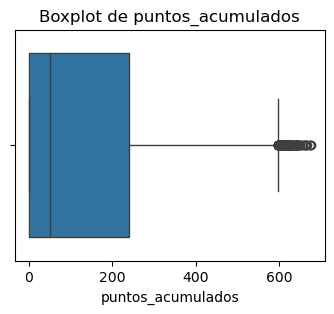

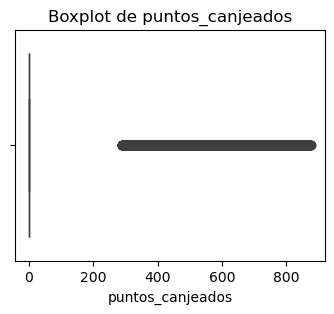

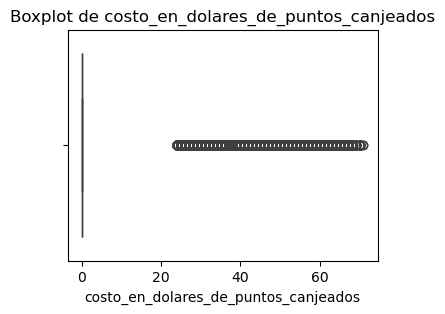

In [29]:
for columna in df_flight_activity.iloc[:,3:]:  # Iteramos sobre las columnas --> bucle for recorre cada columna del DataFrame a partir de la cuarta columna
    plt.figure(figsize=(4, 3)) # Creamos la figura --> 4 pulgadas de ancho, y 3 pulgadas de alto.
    sns.boxplot(x=df_flight_activity[columna]) # Creamos boxplot.
    plt.title(f'Boxplot de {columna}') # Agregamos título.
    plt.xlabel(columna) # Agregamos la etiqueta del eje x con el nombre de la columna.
    plt.show() # Muestra el gráfico


In [30]:
# Buscamos filas duplicadas: 

df_flight_activity.duplicated().sum()

1864

- Nos constan 1864 filas duplicadas en nuestro DF.

In [31]:
# Al tener valores duplicados en las filas, investigamos cuántos clientes únicos tenemos:

df_flight_activity["numero_fidelización"].nunique()

16737

- Los valores únicos de fidelización es = 16737 

In [32]:
# Número de filas antes de eliminar duplicados:

numero_filas_antes_eliminacion = len(df_flight_activity)
print(f"Número de filas antes de eliminar duplicados: {numero_filas_antes_eliminacion}")

Número de filas antes de eliminar duplicados: 405624


In [33]:
 # Eliminamos los duplicados:

df_flight_activity_sin_duplicados = df_flight_activity.drop_duplicates()

In [34]:
# Número de filas después de eliminar duplicados:

numero_filas_despues_eliminacion = len(df_flight_activity_sin_duplicados)
print(f"Número de filas después de eliminar duplicados: {numero_filas_despues_eliminacion}")

Número de filas después de eliminar duplicados: 403760


- Nuestro CSV tenía el nombre de "Customer Flight Activity.csv"
- Al eliminar duplicados queremos guardar nuestro DF, ¿cómo lo hacemos? --> renombrando a "Customer_Flight_Activity_Sin_Duplicados" 

In [35]:
df_flight_activity_sin_duplicados.to_csv("Customer_Flight_Activity_Sin_Duplicados", index=False)

# to_csv: Es un método de Pandas que nos permite guardar el DataFrame como un archivo CSV.
# index=False --> Evita guardar el índice del DataFrame en el archivo CSV.

In [36]:
# ¡! Visualizamos nuestro DF sin duplicados :)

df_flight_activity_sin_duplicados

,numero_fidelización,año,mes,vuelos_reservados,vuelos_con_acompañantes,vuelos_totales,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_puntos_canjeados
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


¿A qué conclusión llegamos con esta visualización...?

- Nos indica que lo hemos guardado correctamente, puesto que nos consta que tenemos 403760 filas y 10 columnas.

--------------------------------------------

- Una vez hemos leído nuestro primer csv, continuamos con el segundo csv ---> Customer Loyalty History

In [37]:
df_loyalty= pd.read_csv("Customer Loyalty History.csv")

In [38]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

- Tenemos columnas de tipo numérico de nuevo. 

In [39]:
df_loyalty.head() # Las cinco primeras filas

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [40]:
df_loyalty.tail() # Las cinco últimas filas

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [41]:
# Como con nuestro primer DF, traducimos al español las columnas de nuestro segundo DF. 

columnas_traducidas2 = {
    'Loyalty Number': 'numero_fidelizacion',
    'Country': 'pais',
    'Province': 'provincia',
    'City': 'ciudad',
    'Postal Code': 'codigo_postal',
    'Gender': 'genero',
    'Education': 'educacion',
    'Salary': 'salario',
    'Marital Status': 'estado_civil',
    'Loyalty Card': 'tarjeta_lealtad',
    'CLV': 'valoracion_cliente',
    'Enrollment Type': 'tipo_inscripcion',
    'Enrollment Year': 'año_inscripcion',
    'Enrollment Month': 'mes_inscripcion',
    'Cancellation Year': 'año_cancelacion',
    'Cancellation Month': 'mes_cancelacion'
}

df_loyalty.rename(columns = columnas_traducidas2, inplace=True)
df_loyalty.head()

,numero_fidelizacion,pais,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,año_inscripcion,mes_inscripcion,año_cancelacion,mes_cancelacion
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [42]:
df_loyalty.shape

(16737, 16)

- Nos indica que tenemos 16737 filas, 16 columnas.

In [43]:
# Comprobamos nulos por columnas

df_loyalty.isna().sum()

numero_fidelizacion        0
pais                       0
provincia                  0
ciudad                     0
codigo_postal              0
genero                     0
educacion                  0
salario                 4238
estado_civil               0
tarjeta_lealtad            0
valoracion_cliente         0
tipo_inscripcion           0
año_inscripcion            0
mes_inscripcion            0
año_cancelacion        14670
mes_cancelacion        14670
dtype: int64

- Observamos que tenemos valores nulos en salario, año_cancelacion y mes_cancelacion.

In [45]:
# Continuamos investigando el porcentaje de nulos

porcentaje_nulos = (df_loyalty.isna().sum()/df_loyalty.shape[0])*100
porcentaje_nulos

numero_fidelizacion     0.000000
pais                    0.000000
provincia               0.000000
ciudad                  0.000000
codigo_postal           0.000000
genero                  0.000000
educacion               0.000000
salario                25.321145
estado_civil            0.000000
tarjeta_lealtad         0.000000
valoracion_cliente      0.000000
tipo_inscripcion        0.000000
año_inscripcion         0.000000
mes_inscripcion         0.000000
año_cancelacion        87.650117
mes_cancelacion        87.650117
dtype: float64

In [46]:
# Convertir a DataFrame:

df_customer_nulos = pd.DataFrame(porcentaje_nulos, columns = ["%_nulos"])

In [47]:
# Filtramos el DataFrame que hemos creado por columnas que tengan nulos:

df_customer_nulos[df_customer_nulos["%_nulos"] > 0]

,%_nulos
salario,25.321145
año_cancelacion,87.650117
mes_cancelacion,87.650117


In [48]:
# Revisamos las columnas categóricas que tienen nulos

nulos_categoricas= df_loyalty[df_loyalty.columns[df_loyalty.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son")
print(nulos_categoricas)

Las columnas categóricas que tienen nulos son
Index([], dtype='object')


In [49]:
# Continuamos revisando las columnas numéricas que tienen nulos

nulos_numericas = df_loyalty[df_loyalty.columns[df_loyalty.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son")
print(nulos_numericas)

Las columnas numéricas que tienen nulos son
Index(['salario', 'año_cancelacion', 'mes_cancelacion'], dtype='object')


In [58]:
# Estadístico de las variables numéricas

df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
numero_fidelizacion,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
salario,16737.0,77779.360817,30357.407569,-58486.00,63899.00,73455.00,82940.00,407228.00
valoracion_cliente,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
año_inscripcion,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
mes_inscripcion,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
año_cancelacion,16737.0,249.035789,663.467530,0.00,0.00,0.00,0.00,2018.00
mes_cancelacion,16737.0,0.859891,2.592671,0.00,0.00,0.00,0.00,12.00


In [60]:
# Estadístico de las categóricas

df_loyalty.describe(include="O").T

,count,unique,top,freq
pais,16737,1,Canada,16737
provincia,16737,11,Ontario,5404
ciudad,16737,29,Toronto,3351
codigo_postal,16737,55,V6E 3D9,911
genero,16737,2,Female,8410
educacion,16737,5,Bachelor,10475
estado_civil,16737,3,Married,9735
tarjeta_lealtad,16737,3,Star,7637
tipo_inscripcion,16737,2,Standard,15766


Vamos a usar boxplots para identificar valores atípicos, ¿por qué?

#Porque los boxplots son una excelente herramienta visual:

- Muestran la distribución de los datos: Los bigotes del boxplot indican el rango de los datos, mientras que la caja muestra los cuartiles.
- Identifican valores extremos: Los puntos fuera de los bigotes son considerados valores atípicos.
- Permiten comparar múltiples columnas: Al crear múltiples boxplots en una misma figura, se pueden comparar fácilmente las distribuciones de diferentes variables y detectar patrones.

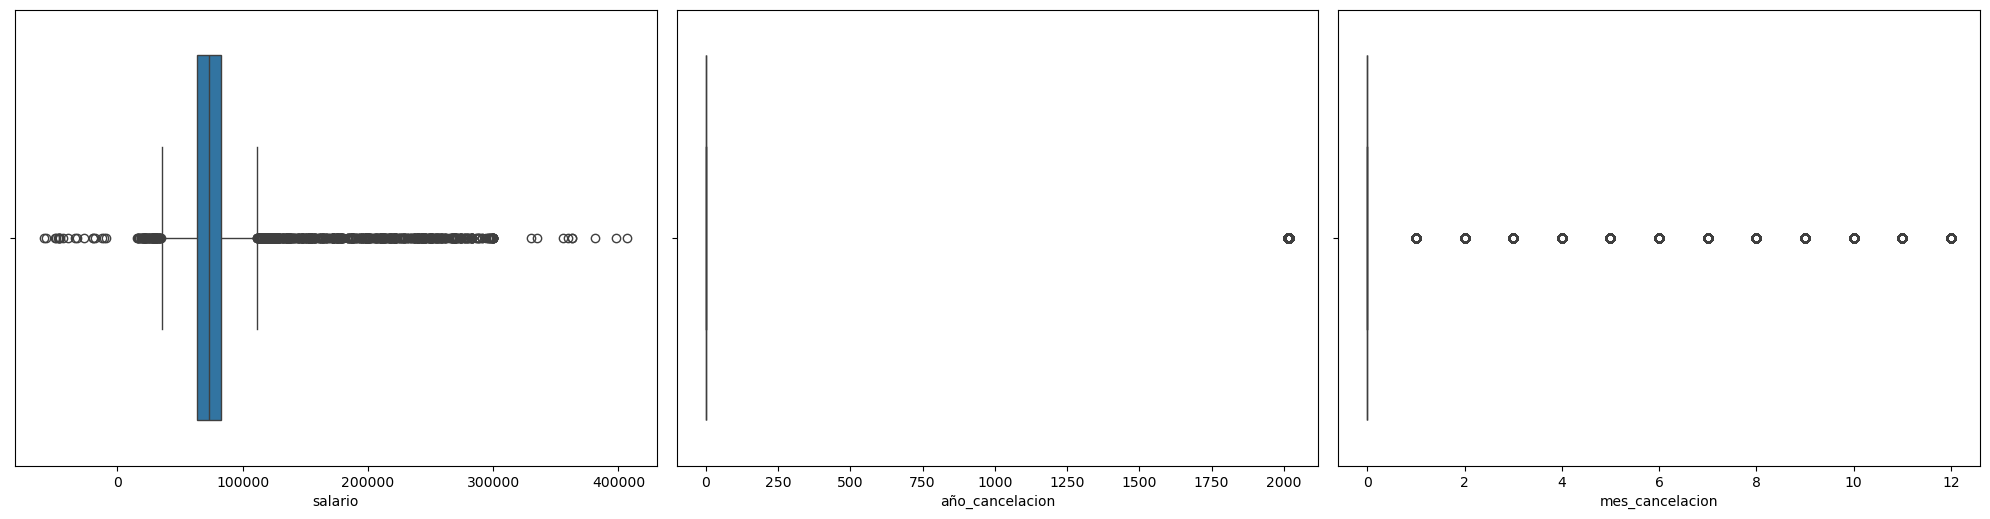

In [63]:
# Columnas donde tenemos valores atípicos

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_numericas):
    sns.boxplot(x = col, data = df_loyalty, ax = axes[indice])

# Eliminamos los ejes vacíos

for i in range(len(nulos_numericas), len(axes)):
    fig.delaxes(axes[i])    

plt.tight_layout()
plt.show()

In [67]:
# Sacamos el salario con la mediana

df_loyalty['salario'] = df_loyalty['salario'].fillna(df_loyalty['salario'].median())
df_loyalty['salario']

0         83236.0
1         73455.0
2         73455.0
3         73455.0
4        103495.0
           ...   
16732     73455.0
16733     89210.0
16734     73455.0
16735    -57297.0
16736     75049.0
Name: salario, Length: 16737, dtype: float64

In [68]:
# Cancellation Year y Cancellation Month con 0

df_loyalty['año_cancelacion'] = df_loyalty['año_cancelacion'].fillna(0)
df_loyalty['mes_cancelacion'] = df_loyalty['mes_cancelacion'].fillna(0)

df_loyalty['año_cancelacion']
df_loyalty['mes_cancelacion']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
16732    0.0
16733    0.0
16734    0.0
16735    0.0
16736    8.0
Name: mes_cancelacion, Length: 16737, dtype: float64